In [34]:
import seaborn as sns

In [7]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
import pandas as pd

# TRAIN FILES
train_c = pd.read_excel("/content/drive/MyDrive/wids/TRAIN_NEW/TRAIN_CATEGORICAL_METADATA_new.xlsx").set_index("participant_id")
train_f = pd.read_csv("/content/drive/MyDrive/wids/TRAIN_NEW/TRAIN_FUNCTIONAL_CONNECTOME_MATRICES_new_36P_Pearson.csv").set_index("participant_id")
train_q = pd.read_excel("/content/drive/MyDrive/wids/TRAIN_NEW/TRAIN_QUANTITATIVE_METADATA_new.xlsx").set_index("participant_id")
train_solution = pd.read_excel("/content/drive/MyDrive/wids/TRAIN_NEW/TRAINING_SOLUTIONS.xlsx").set_index("participant_id")

# TEST FILES
test_c = pd.read_excel("/content/drive/MyDrive/wids/TEST/TEST_CATEGORICAL.xlsx").set_index("participant_id")
test_f = pd.read_csv("/content/drive/MyDrive/wids/TEST/TEST_FUNCTIONAL_CONNECTOME_MATRICES.csv").set_index("participant_id")
test_q = pd.read_excel("/content/drive/MyDrive/wids/TEST/TEST_QUANTITATIVE_METADATA.xlsx").set_index("participant_id")


# **Further Analysis and Preprocessing**

In [14]:
import pandas as pd

def get_feats(data_input_folder, mode):
    """
    Load data for the specified mode (TRAIN or TEST).
    """

    # Load datasets based on the mode:
    if mode == 'TRAIN':
        # Load categorical data:
        cat_features         = pd.read_excel(f"{data_input_folder}/TRAIN_NEW/TRAIN_CATEGORICAL_METADATA_new.xlsx").set_index("participant_id")
        # Load quantitative data:
        quant_features       = pd.read_excel(f"{data_input_folder}/TRAIN_NEW/TRAIN_QUANTITATIVE_METADATA_new.xlsx").set_index("participant_id")
        # Load connectome matrices:
        connectome_features  = pd.read_csv(f"{data_input_folder}/TRAIN_NEW/TRAIN_FUNCTIONAL_CONNECTOME_MATRICES_new_36P_Pearson.csv").set_index("participant_id")
        # Load solutions:
        solution = pd.read_excel(f"{data_input_folder}/TRAIN_NEW/TRAINING_SOLUTIONS.xlsx").set_index("participant_id")
    else:
        # Load categorical data:
        cat_features         = pd.read_excel(f"{data_input_folder}/TEST/TEST_CATEGORICAL.xlsx").set_index("participant_id")
        # Load quantitative data:
        quant_features       = pd.read_excel(f"{data_input_folder}/TEST/TEST_QUANTITATIVE_METADATA.xlsx").set_index("participant_id")
        # Load connectome matrices:
        connectome_features  = pd.read_csv(f"{data_input_folder}/TEST/TEST_FUNCTIONAL_CONNECTOME_MATRICES.csv").set_index("participant_id")

    # Merge datasets into one:
    features = pd.merge(quant_features, cat_features, on='participant_id', how='left')
    features = pd.merge(features, connectome_features, on='participant_id', how='left')

    if mode == 'TRAIN':
        # Merge with solutions
        features = pd.merge(features, solution, on='participant_id', how='left')

    return features, cat_features, quant_features, connectome_features

# Define the Google Drive path:
input_folder = "/content/drive/MyDrive/wids"

# Load training and test data - aggregate and by dataset type:
print("Loading data...")
train, train_cat, train_quant, train_connectome = get_feats(data_input_folder=input_folder, mode='TRAIN')
test, test_cat, test_quant, pca_test_df_connectome = get_feats(data_input_folder=input_folder, mode='TEST')

# Load solutions for training data
train_solutions = pd.read_excel(f"{input_folder}/TRAIN_NEW/TRAINING_SOLUTIONS.xlsx").set_index("participant_id")

# Display the first few rows of the training data
train.head()


Loading data...


,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,...,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn,ADHD_Outcome,Sex_F
participant_id,,,,,,,,,,,,,,,,,,,,,
00aIpNTbG5uh,100.00,13.0,3.0,15.0,44.0,14.0,20.0,27.0,3.0,17.0,...,-0.280312,0.037560,0.423037,0.242453,0.336213,0.402338,0.327915,0.539032,1,0
00fV0OyyoLfw,92.27,14.0,3.0,12.0,35.0,25.0,28.0,30.0,5.0,20.0,...,-0.332783,-0.332711,0.556939,0.475578,0.429196,0.457970,0.312571,0.595978,1,0
04X1eiS79T4B,86.67,14.0,3.0,21.0,37.0,18.0,26.0,28.0,3.0,24.0,...,-0.002132,-0.175586,0.679183,0.290292,0.486680,0.255208,0.575017,0.605182,0,1
05ocQutkURd6,93.34,14.0,3.0,11.0,42.0,15.0,20.0,28.0,0.0,5.0,...,-0.199576,-0.216457,0.519074,0.298586,0.415466,0.511607,0.361204,0.446613,0,1
06YUNBA9ZRLq,0.00,14.0,8.0,12.0,35.0,22.0,12.0,24.0,6.0,23.0,...,-0.141012,-0.002865,0.515169,0.336139,0.316430,0.442230,0.177079,0.378278,1,0


In [15]:
connectome_cols = [col for col in train.columns if 'throw' in col]
print(len(connectome_cols))

19900


In [21]:
# Get the number of missing values in the training data
missing_values = train_connectome.isnull().sum().sum()

# Display the total number of missing values
print("Number of missing values:" , missing_values)


Number of missing values: 0


=== BRAIN CONNECTIVITY ANALYSIS ===
Number of brain connectivity features: 19900
First few connectivity features: ['0throw_1thcolumn', '0throw_2thcolumn', '0throw_3thcolumn', '0throw_4thcolumn', '0throw_5thcolumn']


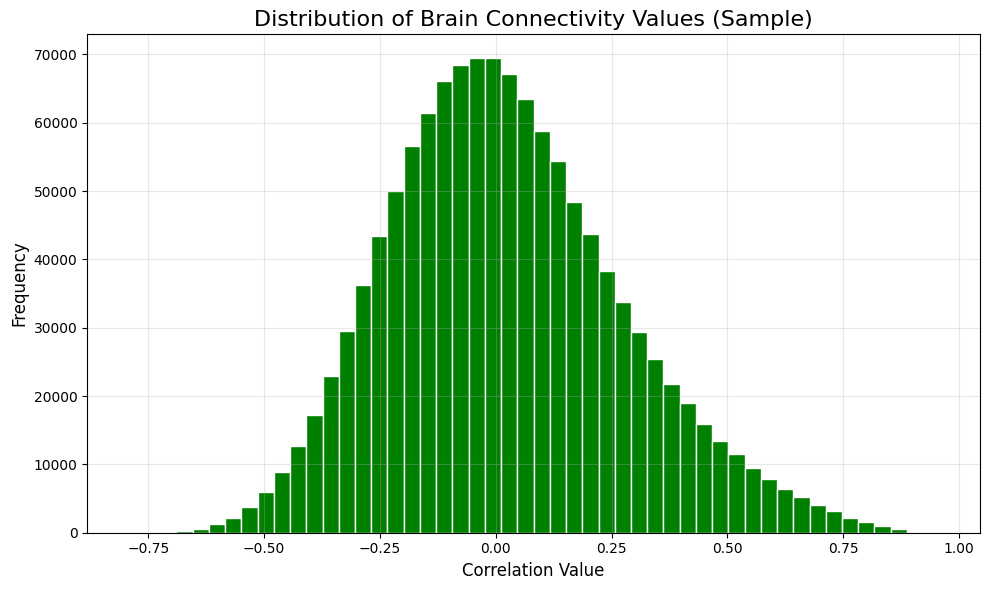

In [28]:
import matplotlib.pyplot as plt
import numpy as np

print("=== BRAIN CONNECTIVITY ANALYSIS ===")

# 1. Identify brain connectivity features
print(f"Number of brain connectivity features: {len(connectome_cols)}")
print(f"First few connectivity features: {connectome_cols[:5]}")

# 2. Distribution of connectivity values (sample)
plt.figure(figsize=(10, 6))
# Take a random sample to avoid memory issues
sample_size = min(1000, len(connectome_cols))
np.random.seed(42)
sample_cols = np.random.choice(connectome_cols, sample_size)
all_values = train[sample_cols].values.flatten()
all_values = all_values[~np.isnan(all_values)]  # Remove NaN values if any

# Use a more modern color palette
plt.hist(all_values, bins=50, color='g', edgecolor='w')
plt.title('Distribution of Brain Connectivity Values (Sample)', fontsize=16)
plt.xlabel('Correlation Value', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


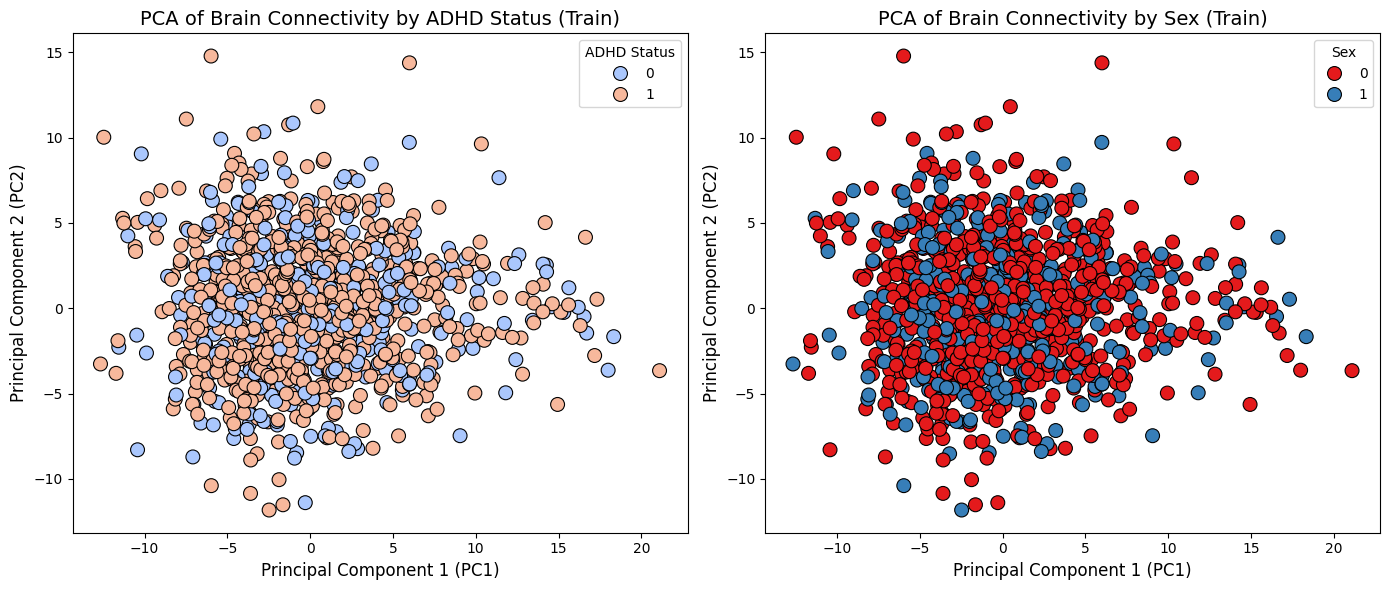

Variance explained by PC1: 4.97%
Variance explained by PC2: 2.69%


In [38]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Take 500 random features for PCA
sample_size = min(500, len(connectome_cols))
np.random.seed(42)
pca_sample = np.random.choice(connectome_cols, sample_size)

# Standardize the data
X = train[pca_sample].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with PCA results
pca_train_df_connectome = pd.DataFrame({
    'PC1_C': X_pca[:, 0],
    'PC2_C': X_pca[:, 1],
    'ADHD': train['ADHD_Outcome'].values,
    'Sex': train['Sex_F'].values
})

# Set PCA columns:
pca_cols_connectome = ['PC1_C', 'PC2_C']

# Plot PCA results with new style and different color palettes
plt.figure(figsize=(14, 6))

# Plot By ADHD
plt.subplot(1, 2, 1)
sns.scatterplot(x='PC1_C', y='PC2_C', hue='ADHD', data=pca_train_df_connectome, palette='coolwarm', s=100, edgecolor='black')
plt.title('PCA of Brain Connectivity by ADHD Status (Train)', fontsize=14)
plt.xlabel('Principal Component 1 (PC1)', fontsize=12)
plt.ylabel('Principal Component 2 (PC2)', fontsize=12)
plt.legend(title='ADHD Status', loc='upper right')

# Plot By Sex
plt.subplot(1, 2, 2)
sns.scatterplot(x='PC1_C', y='PC2_C', hue='Sex', data=pca_train_df_connectome, palette='Set1', s=100, edgecolor='black')
plt.title('PCA of Brain Connectivity by Sex (Train)', fontsize=14)
plt.xlabel('Principal Component 1 (PC1)', fontsize=12)
plt.ylabel('Principal Component 2 (PC2)', fontsize=12)
plt.legend(title='Sex', loc='upper right')

plt.tight_layout()
plt.show()

# Print explained variance
print(f"Variance explained by PC1: {pca.explained_variance_ratio_[0]*100:.2f}%")
print(f"Variance explained by PC2: {pca.explained_variance_ratio_[1]*100:.2f}%")


Variance explained by PC1: 9.52%
Variance explained by PC2: 2.86%


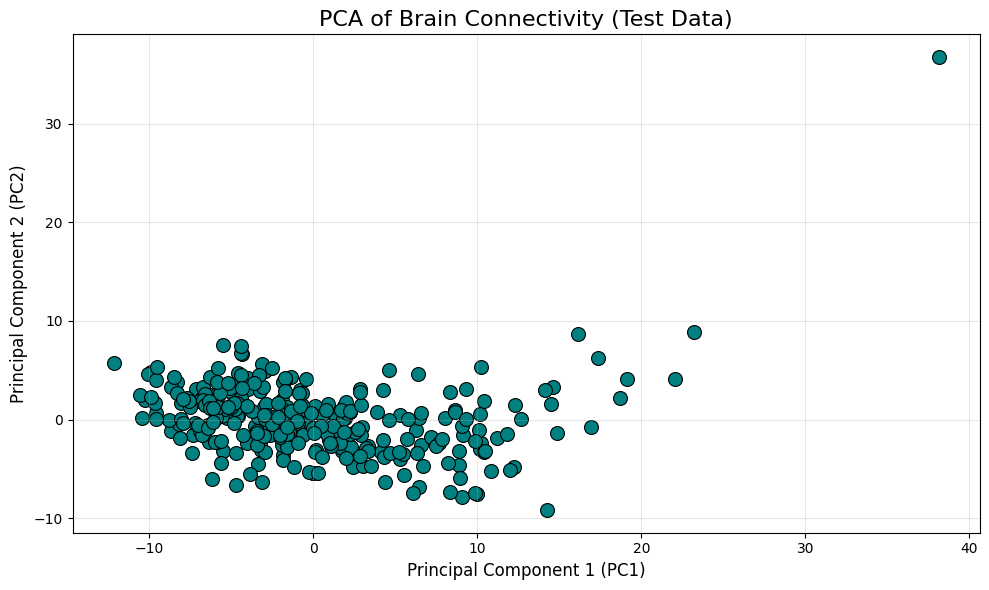

In [39]:
# Take 500 random features for PCA
sample_size = min(500, len(connectome_cols))
np.random.seed(42)
pca_sample = np.random.choice(connectome_cols, sample_size)

# Standardize the data
X = test[pca_sample].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with PCA results
pca_test_df_connectome = pd.DataFrame({
    'PC1_C': X_pca[:, 0],
    'PC2_C': X_pca[:, 1]
})

# Print explained variance
print(f"Variance explained by PC1: {pca.explained_variance_ratio_[0]*100:.2f}%")
print(f"Variance explained by PC2: {pca.explained_variance_ratio_[1]*100:.2f}%")

# Plot PCA results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1_C', y='PC2_C', data=pca_test_df_connectome, color='teal', s=100, edgecolor='black')

# Customize plot appearance
plt.title('PCA of Brain Connectivity (Test Data)', fontsize=16)
plt.xlabel('Principal Component 1 (PC1)', fontsize=12)
plt.ylabel('Principal Component 2 (PC2)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


# **Preprocessing**

### ***drop Unnecessary cols***

In [40]:
train_c = train_c.drop(['Basic_Demos_Enroll_Year','Basic_Demos_Study_Site','MRI_Track_Scan_Location'], axis = 1)
test_c  = test_c.drop(['Basic_Demos_Enroll_Year','Basic_Demos_Study_Site','MRI_Track_Scan_Location'], axis = 1)

In [41]:
train_q = train_q.drop(['EHQ_EHQ_Total', 'APQ_P_APQ_P_CP', 'MRI_Track_Age_at_Scan'], axis = 1)
test_q  = test_q.drop(['EHQ_EHQ_Total', 'APQ_P_APQ_P_CP', 'MRI_Track_Age_at_Scan'], axis = 1)

## ***Dimension Reduction***

Train

In [43]:
nr_pca_components = 4
# Extract the ID column:
participant_id = train_q.iloc[:, 0]

# Select only numeric columns for PCA:
train_quant_numeric = train_q.iloc[:, 1:]

# Replace missing values by the mean as otherwise PCA does not run:
train_quant_numeric.fillna(train_quant_numeric.median(), inplace=True)

# Standardise data:
scaler = StandardScaler()
train_quant_scaled = scaler.fit_transform(train_quant_numeric)

# Apply PCA:
pca = PCA(n_components= nr_pca_components)
train_quant_pca = pca.fit_transform(train_quant_scaled)

# Set PCA columns:
pca_columns = []
for i in range(0,nr_pca_components):
    pca_columns.append(f"PC{i+1}")

# Convert dataframe:
train_quant_pca = pd.DataFrame(train_quant_pca, columns= pca_columns)

# Add Back the participant_id:
train_quant_pca.insert(0, 'participant_id', participant_id.values)

# Check variance explained:
explained_variance = pca.explained_variance_ratio_
total_explained_variance = explained_variance.sum()

print(f"Variance explained by each component of training dataset: {explained_variance}")
print(f"Total variance explained by {nr_pca_components} components of training dataset: {total_explained_variance:.1%}")

Variance explained by each component of training dataset: [0.39826469 0.12361606 0.09992065 0.08236176]
Total variance explained by 4 components of training dataset: 70.4%


<ipython-input-43-eb4deb0c2d3f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_quant_numeric.fillna(train_quant_numeric.median(), inplace=True)


Test

In [44]:
# Extract the ID column:
participant_id = test_quant.iloc[:, 0]

# Select only numeric columns for PCA:
test_quant_numeric = test_quant.iloc[:, 1:]

# Replace missing values by the mean as otherwise PCA does not run:
test_quant_numeric.fillna(test_quant_numeric.median(), inplace=True)

# Standardise data:
scaler = StandardScaler()
test_quant_scaled = scaler.fit_transform(test_quant_numeric)

# Apply PCA:
pca = PCA(n_components= nr_pca_components)
test_quant_pca = pca.fit_transform(test_quant_scaled)

# Set PCA columns:
pca_columns = []
for i in range(0,nr_pca_components):
    pca_columns.append(f"PC{i+1}")

# Convert dataframe:
test_quant_pca = pd.DataFrame(test_quant_pca, columns= pca_columns)

# Add Back the participant_id:
test_quant_pca.insert(0, 'participant_id', participant_id.values)

# Check variance explained:
explained_variance = pca.explained_variance_ratio_
total_explained_variance = explained_variance.sum()

print(f"Variance explained by each component of test dataset: {explained_variance}")
print(f"Total variance explained by {nr_pca_components} components of test datset: {total_explained_variance:.1%}")


Variance explained by each component of test dataset: [0.30579604 0.15944    0.10725564 0.07529953]
Total variance explained by 4 components of test datset: 64.8%


<ipython-input-44-ec53e2d68c1f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_quant_numeric.fillna(test_quant_numeric.median(), inplace=True)


### **Update after PCA**

In [46]:
train.drop(columns=train_quant.columns[1:], inplace=True)
train[pca_columns] = train_quant_pca[pca_columns]
test.drop(columns=test_quant.columns[1:], inplace=True)
test[pca_columns] = test_quant_pca[pca_columns]


In [47]:
train.drop(columns = connectome_cols, inplace=True)
train[pca_cols_connectome] = pca_train_df_connectome[pca_cols_connectome]
test.drop(columns  = connectome_cols, inplace=True)
test[pca_cols_connectome]  = pca_test_df_connectome[pca_cols_connectome]

### **Handling missing values**

In [48]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [52]:
# Check for missing values in the training data
missing = train.isnull().sum()
missing_percent = 100 * missing / len(train)
missing_df = pd.DataFrame({
    'Missing Values': missing,
    'Percentage': missing_percent
})


# Display features with missing values
missing_features = missing_df[missing_df['Missing Values'] > 0].sort_values('Percentage', ascending=False)
print("\nFeatures with missing values in training data:")
missing_features


Features with missing values in training data:


,Missing Values,Percentage
Barratt_Barratt_P2_Occ,222,18.301731
Barratt_Barratt_P2_Edu,198,16.323166
PreInt_Demos_Fam_Child_Race,54,4.451772
PreInt_Demos_Fam_Child_Ethnicity,43,3.544930
Barratt_Barratt_P1_Occ,31,2.555647
Barratt_Barratt_P1_Edu,15,1.236603
EHQ_EHQ_Total,13,1.071723
MRI_Track_Scan_Location,3,0.247321


In [51]:
cols_to_drop = ['PC2_C', 'PC1_C', 'PC3', 'PC4', 'PC1', 'PC2']
train.drop(columns=cols_to_drop, inplace=True, errors='ignore')
test.drop(columns=cols_to_drop, inplace=True, errors='ignore')

the high missing values are quite impoertant so i can't drop them

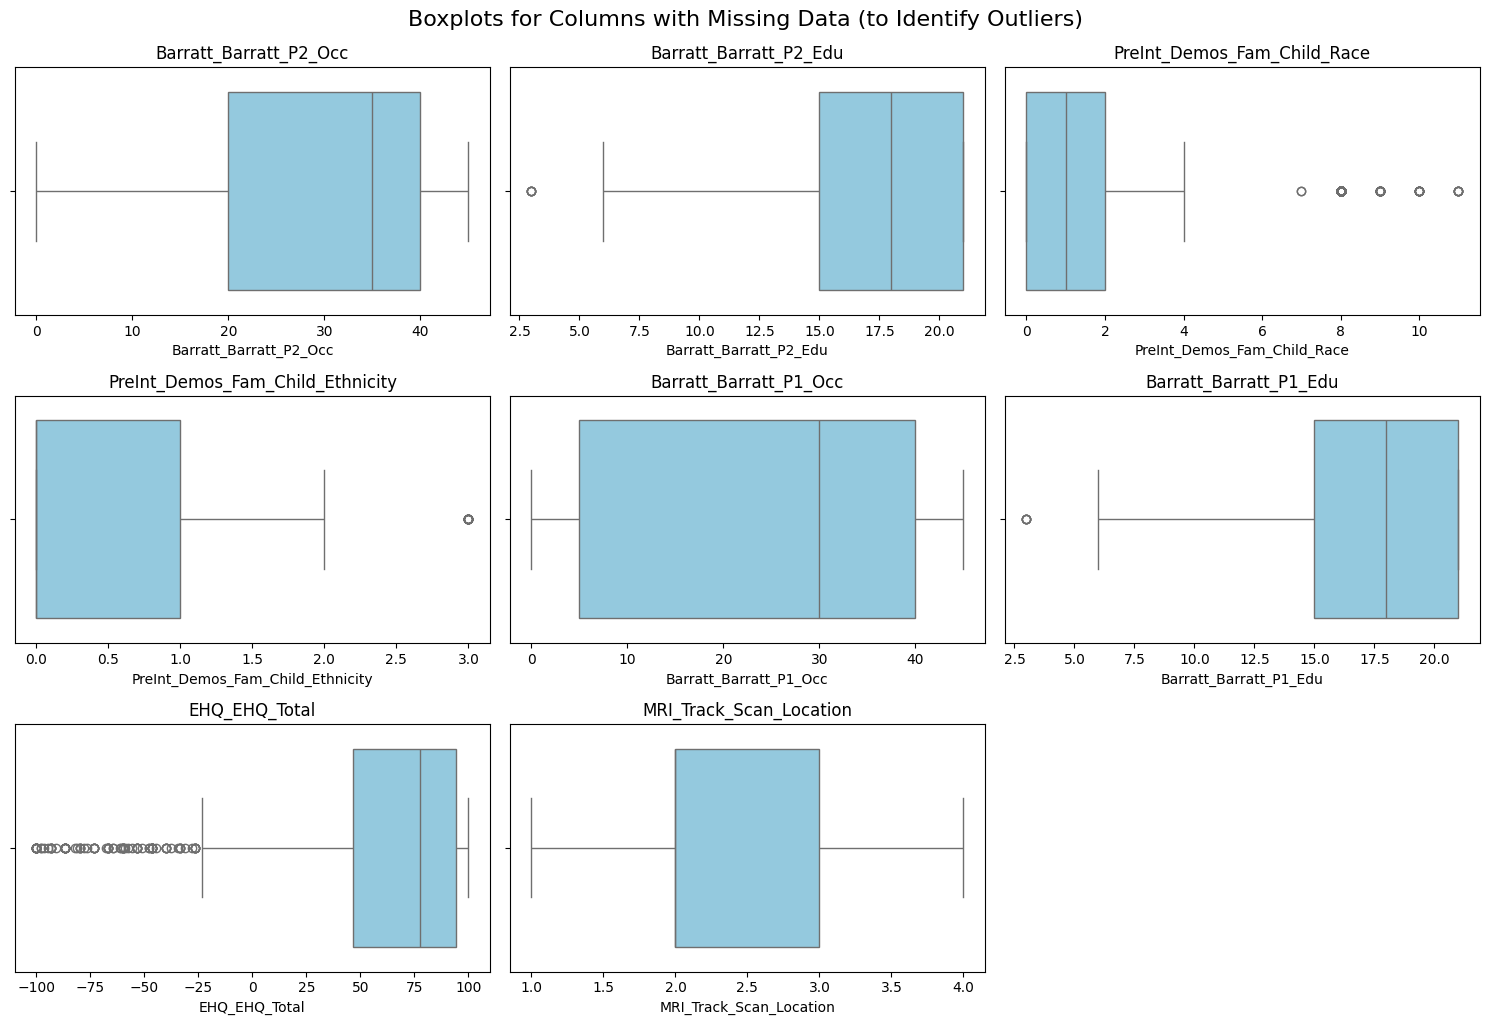

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of columns with missing values
cols_with_missing = [
    'Barratt_Barratt_P2_Occ', 'Barratt_Barratt_P2_Edu',
    'PreInt_Demos_Fam_Child_Race', 'PreInt_Demos_Fam_Child_Ethnicity',
    'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P1_Edu',
    'EHQ_EHQ_Total', 'MRI_Track_Scan_Location'
]

# Filter only numeric columns for boxplots
numeric_cols = [col for col in cols_with_missing if pd.api.types.is_numeric_dtype(train[col])]

# Create box plots
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=train[col], color='skyblue')
    plt.title(col)
    plt.tight_layout()

plt.suptitle('Boxplots for Columns with Missing Data (to Identify Outliers)', fontsize=16, y=1.02)
plt.show()


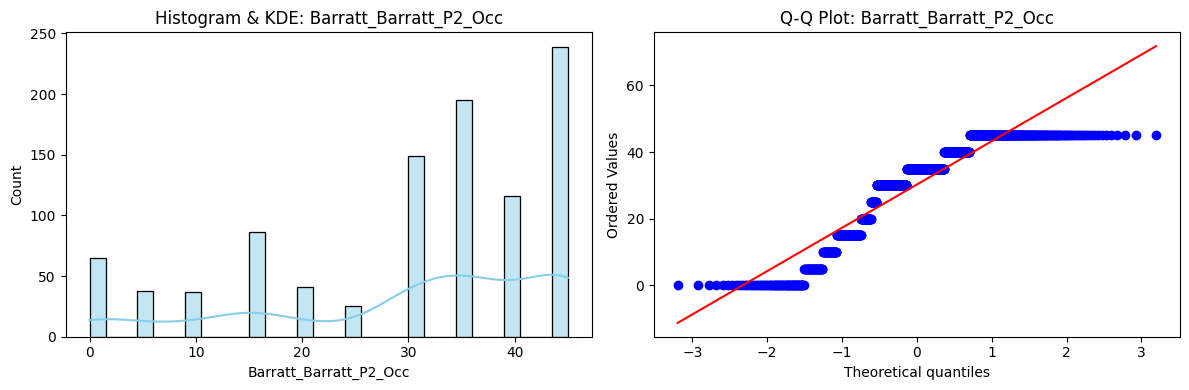

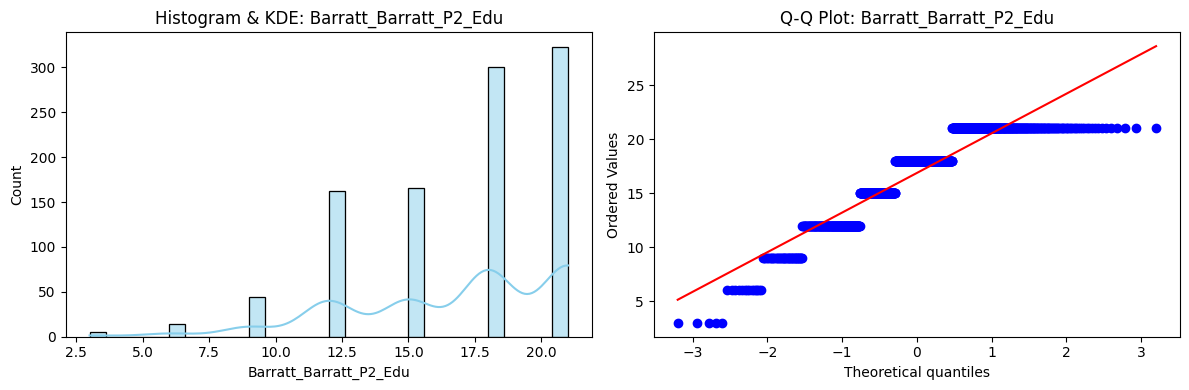

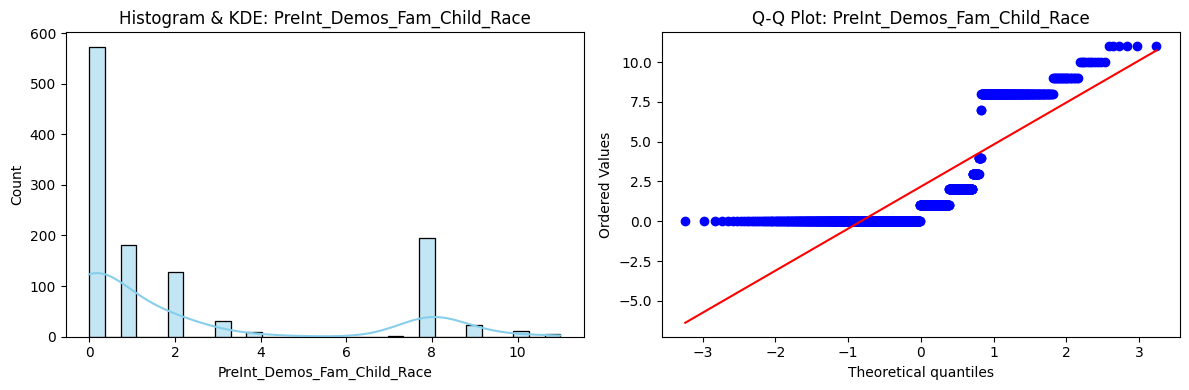

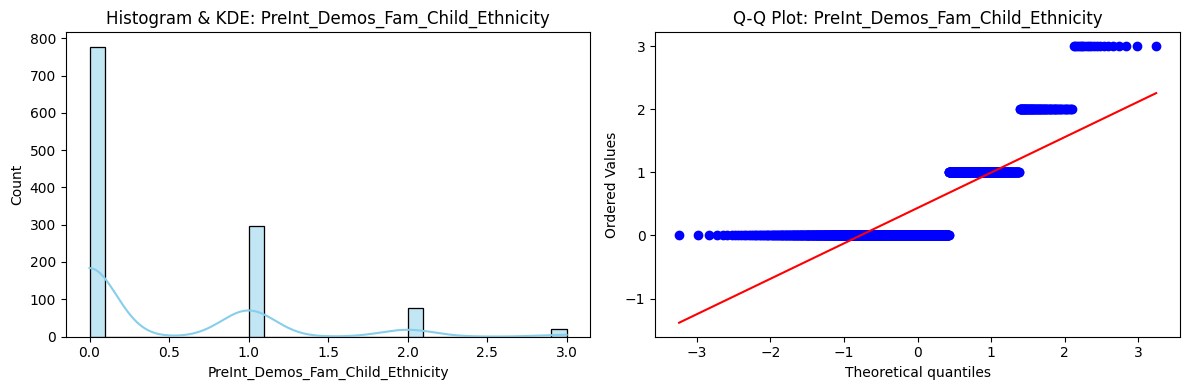

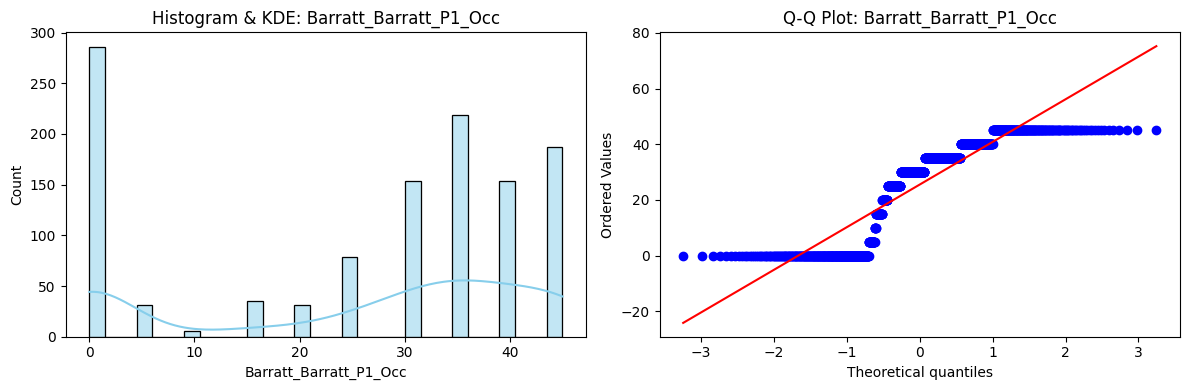

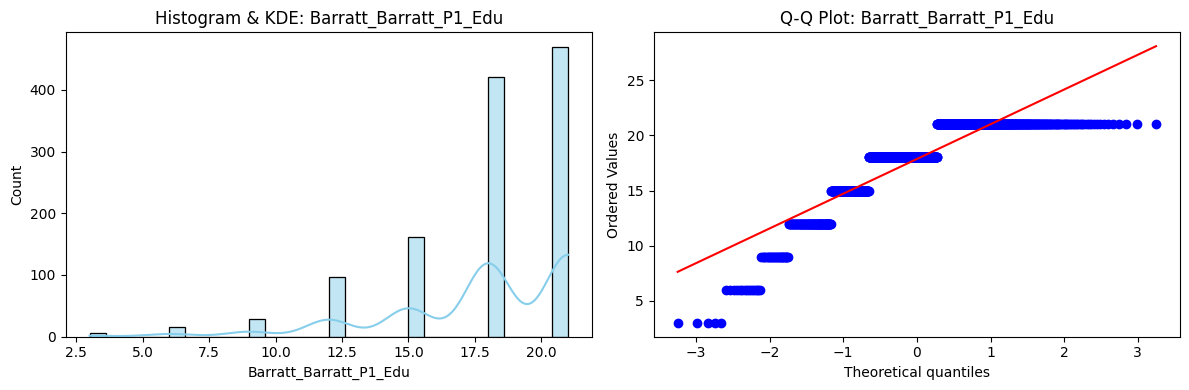

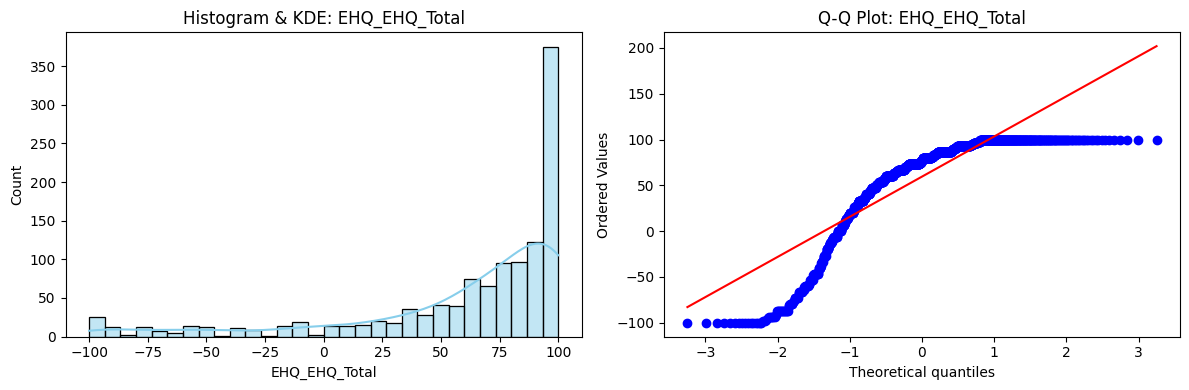

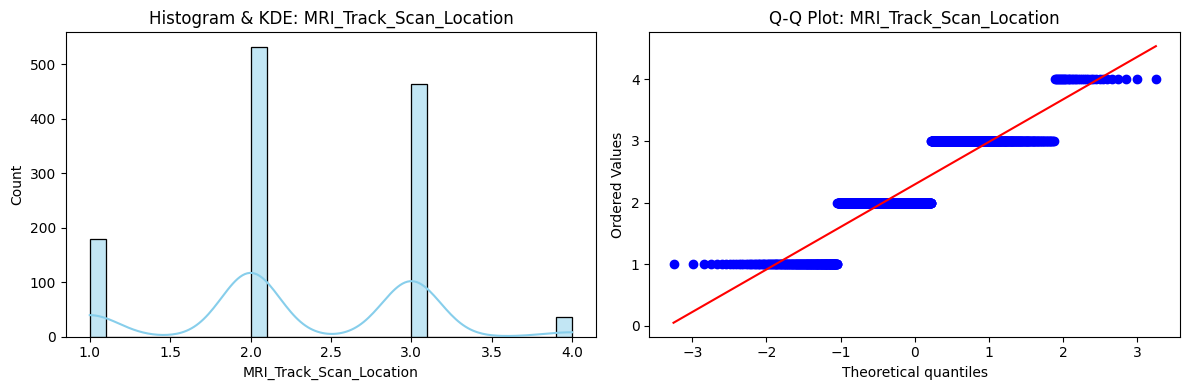

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Define your high-missing columns
missing_cols = [
    'Barratt_Barratt_P2_Occ', 'Barratt_Barratt_P2_Edu',
    'PreInt_Demos_Fam_Child_Race', 'PreInt_Demos_Fam_Child_Ethnicity',
    'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P1_Edu',
    'EHQ_EHQ_Total', 'MRI_Track_Scan_Location'
]

# Plot histograms with KDE and Q-Q plots
for col in missing_cols:
    if col in train.columns:
        # Drop NaNs for this column temporarily
        data = train[col].dropna()

        plt.figure(figsize=(12, 4))

        # Histogram + KDE
        plt.subplot(1, 2, 1)
        sns.histplot(data, kde=True, bins=30, color='skyblue')
        plt.title(f"Histogram & KDE: {col}")

        # Q-Q Plot
        plt.subplot(1, 2, 2)
        stats.probplot(data, dist="norm", plot=plt)
        plt.title(f"Q-Q Plot: {col}")

        plt.tight_layout()
        plt.show()


the data for the high missing values are not normally distributed and are not really effective in our future process

In [56]:
cols_to_drop = ['Barratt_Barratt_P2_Occ', 'Barratt_Barratt_P2_Edu']
existing_cols_train = [col for col in cols_to_drop if col in train.columns]
existing_cols_test = [col for col in cols_to_drop if col in test.columns]

# Now drop only existing columns
train.drop(columns=existing_cols_train, inplace=True)
test.drop(columns=existing_cols_test, inplace=True)


In [58]:
train.columns

Index(['EHQ_EHQ_Total', 'Basic_Demos_Enroll_Year', 'Basic_Demos_Study_Site',
       'PreInt_Demos_Fam_Child_Ethnicity', 'PreInt_Demos_Fam_Child_Race',
       'MRI_Track_Scan_Location', 'Barratt_Barratt_P1_Edu',
       'Barratt_Barratt_P1_Occ', 'ADHD_Outcome', 'Sex_F'],
      dtype='object')

In [59]:
test.columns

Index(['EHQ_EHQ_Total', 'Basic_Demos_Enroll_Year', 'Basic_Demos_Study_Site',
       'PreInt_Demos_Fam_Child_Ethnicity', 'PreInt_Demos_Fam_Child_Race',
       'MRI_Track_Scan_Location', 'Barratt_Barratt_P1_Edu',
       'Barratt_Barratt_P1_Occ'],
      dtype='object')

### ***for the low number of missing values it can be easily filled***

In [60]:
# List of columns with low missing values
cols_to_fill = [
    'PreInt_Demos_Fam_Child_Race', 'PreInt_Demos_Fam_Child_Ethnicity',
    'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P1_Edu',
    'EHQ_EHQ_Total', 'MRI_Track_Scan_Location'
]

# Fill strategy per column type
for col in cols_to_fill:
    if col in train.columns:
        if train[col].dtype == 'object' or train[col].nunique() < 20:
            # Likely categorical, fill with mode
            fill_value = train[col].mode().iloc[0]
        else:
            # Likely numerical, fill with median
            fill_value = train[col].median()

        train[col].fillna(fill_value, inplace=True)
        if col in test.columns:
            test[col].fillna(fill_value, inplace=True)


<ipython-input-60-d4f410be9672>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train[col].fillna(fill_value, inplace=True)
<ipython-input-60-d4f410be9672>:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using '

In [61]:
# Check for missing values in the training data
missing = train.isnull().sum()
missing_percent = 100 * missing / len(train)
missing_df = pd.DataFrame({
    'Missing Values': missing,
    'Percentage': missing_percent
})


# Display features with missing values
missing_features = missing_df[missing_df['Missing Values'] > 0].sort_values('Percentage', ascending=False)
print("\nFeatures with missing values in training data:")
missing_features


Features with missing values in training data:


,Missing Values,Percentage
